In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.ticker as ticker
from scipy.interpolate import BSpline

In [122]:
x_data = np.array([10,11,12,13,14,15,16,17,18,19,20])
y_data = np.array([860,856,880,885,856,847,888,702,190,18,13])/60
X_data = np.array([10,11,12,13,14,15,16,17,18,19,20])[6:10]
Y_data = np.array([860,856,880,885,856,847,888,702,190,18,13])[6:10]/60


a =  -5.20333333334686
b =  98.55000000021269
sigma_a =  0.7857551004756145
sigma_b =  13.778748347797485
S_e =  1.242387933689706
Relative S_r a = %  15.100994884181393
Relative S_r b = %  13.981479804939367


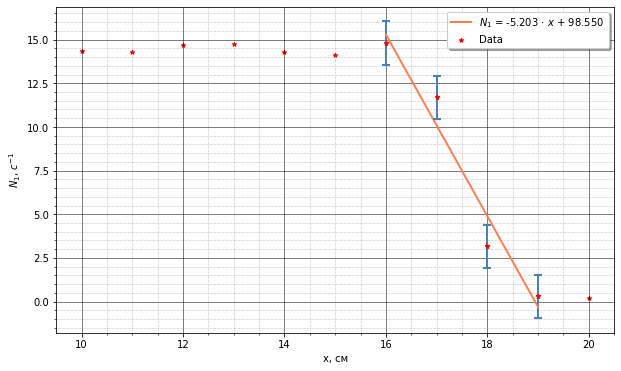

In [123]:
def approx(x, a, b):  # определим функцию аппроксимации
    return a*x+b

beta_opt1, beta_cov1 = curve_fit(approx, X_data, Y_data)

# коэффициенты
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)

# подсчитаем стандартную ошибку аппроксимации
residuals1 = Y_data - approx(X_data,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X_data))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))


# если гиафик не линейный, то лучше создать массив точек, чтобы график был плавным,
# вместо X_data вставить dots код ниже
# dots = np.arange(start, stop, step)
ax.plot(X_data, approx(X_data, *beta_opt1), 'coral', lw = 2)


ax.scatter(x_data, y_data, marker = '*', color = 'red', s = 20) # это строит "звездочками" твои начальные данные

lgnd = ax.legend([r'$N_1$ = %.3f $\cdot$ $x$ + %.3f ' %(a,b), 'Data'], loc='best', shadow=True) # это легенда в графике
# поставив r перед '' можно внутри '' писать латеховские формулы внутри $$
# кожффициенты аппроксимации можно не писать каждый раз самому, а сделать ссылку на переменную через %.3f и в конце написать %(a)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$N_1$, $c^{-1}$')
ax.set_xlabel(r'x, см')

# это создает сетку и делает маркеры на осях
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

# это кресты погрещности, но только вдоль оси Y
plt.errorbar(X_data, Y_data, fmt = 'ro', marker = '*', markersize = '5', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'steelblue')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('gr1.png', dpi=400, quality=100)
plt.show()

In [48]:
17.5 *np.sqrt(15.100994884181393**2 + 13.981479804939367**2)/ 100

3.6014380267967265

In [32]:
np.sqrt(15.100994884181393**2 + 13.981479804939367**2)/ 100

-3.8977401029449332

In [50]:
17.5 * 0.0001293 * np.sqrt(15.100994884181393**2 + 13.981479804939367**2)/ 100

0.0004656659368648167

In [56]:
(2.26/0.32)**(2/3) *np.sqrt(15.100994884181393**2 + 13.981479804939367**2)/ 100

0.7575480845263189

In [72]:
X1_data = np.array([1333.22, 7999.32, 14665.42, 21331.52, 27997.62, 34663.72, 41329.82, 47995.92, 54662.02, 61328.12, 67994.22, 74660.32, 81326.42, 87992.52, 94658.62, 101324.72])[:12]
Y1_data = np.array([5, 72, 160, 239, 328 ,424, 517, 626, 725, 840, 949, 1024, 1036, 1021, 1013, 1000])[:12]
X2_data = np.array([1333.22, 7999.32, 14665.42, 21331.52, 27997.62, 34663.72, 41329.82, 47995.92, 54662.02, 61328.12, 67994.22, 74660.32, 81326.42, 87992.52, 94658.62, 101324.72])[11:]
Y2_data = np.array([5, 72, 160, 239, 328 ,424, 517, 626, 725, 840, 949, 1024, 1036, 1021, 1013, 1000])[11:]
x_data = np.array([1333.22, 7999.32, 14665.42, 21331.52, 27997.62, 34663.72, 41329.82, 47995.92, 54662.02, 61328.12, 67994.22, 74660.32, 81326.42, 87992.52, 94658.62, 101324.72])
y_data = np.array([5, 72, 160, 239, 328 ,424, 517, 626, 725, 840, 949, 1024, 1036, 1021, 1013, 1000])


a =  0.014308384039843854
b =  -51.255710737670384
sigma_a =  0.0002575834487452584
sigma_b =  11.442314269181093
S_e =  18.744211745775644
Relative S_r a = %  1.8002273913530584
Relative S_r b = %  22.32397932738364

 a =  -0.0010650905504312005
b =  1112.5200015606763
sigma_a =  0.0007424182103798185
sigma_b =  44.41465318726708
S_e =  6.491532946846995
Relative S_r a = %  37.32614636477661
Relative S_r b = %  3.162393514022933


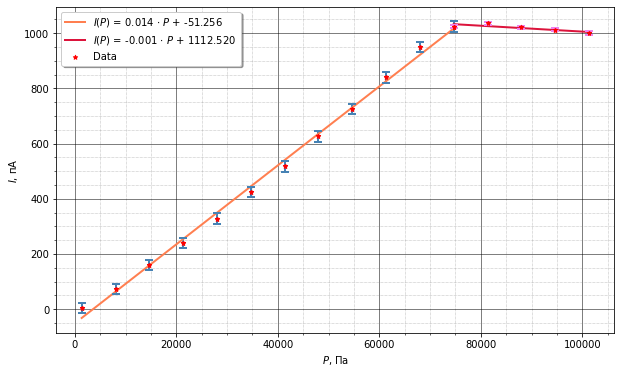

In [76]:
def approx(x, a, b):  # определим функцию аппроксимации
    return a*x+b

beta_opt1, beta_cov1 = curve_fit(approx, X1_data, Y1_data)

# коэффициенты
a1 = beta_opt1[0]
b1 = beta_opt1[1]

print('a = ', a1)
print('b = ', b1)

#получим погрешности для коэффициентов
sigma_a1 = np.sqrt(beta_cov1[0,0])
sigma_b1 = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a1)
print('sigma_b = ', sigma_b1)

# подсчитаем стандартную ошибку аппроксимации
residuals1 = Y1_data - approx(X1_data,*beta_opt1)
fres1 = sum(residuals1**2)
S_e1 = np.sqrt(fres1/len(X1_data))
print('S_e = ', S_e1)


print('Relative S_r a = % ', 100* sigma_a1/abs(a1))
print('Relative S_r b = % ', 100* sigma_b1/abs(b1))



beta_opt2, beta_cov2 = curve_fit(approx, X2_data, Y2_data)

# коэффициенты
a2 = beta_opt2[0]
b2 = beta_opt2[1]

print('\n a = ', a2)
print('b = ', b2)

#получим погрешности для коэффициентов
sigma_a2 = np.sqrt(beta_cov2[0,0])
sigma_b2= np.sqrt(beta_cov2[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)

# подсчитаем стандартную ошибку аппроксимации
residuals2 = Y2_data - approx(X2_data,*beta_opt2)
fres2 = sum(residuals2**2)
S_e2 = np.sqrt(fres2/len(X2_data))
print('S_e = ', S_e2)


print('Relative S_r a = % ', 100* sigma_a2/abs(a2))
print('Relative S_r b = % ', 100* sigma_b2/abs(b2))



# график
fig, ax = plt.subplots(figsize=(10, 6))


# если гиафик не линейный, то лучше создать массив точек, чтобы график был плавным,
# вместо X_data вставить dots код ниже
# dots = np.arange(start, stop, step)
ax.plot(X1_data, approx(X1_data, *beta_opt1), 'coral', lw = 2)
ax.plot(X2_data, approx(X2_data, *beta_opt2), 'crimson', lw = 2)

ax.scatter(x_data, y_data, marker = '*', color = 'red', s = 20) # это строит "звездочками" твои начальные данные

lgnd = ax.legend([r'$I(P)$ = %.3f $\cdot$ $P$ + %.3f ' %(a1,b1), r'$I(P)$ = %.3f $\cdot$ $P$ + %.3f ' %(a2,b2), 'Data'], loc='best', shadow=True) # это легенда в графике
# поставив r перед '' можно внутри '' писать латеховские формулы внутри $$
# кожффициенты аппроксимации можно не писать каждый раз самому, а сделать ссылку на переменную через %.3f и в конце написать %(a)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$I$, пА')
ax.set_xlabel(r'$P$, Па')

# это создает сетку и делает маркеры на осях
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

# это кресты погрещности, но только вдоль оси Y
plt.errorbar(X1_data, Y1_data, fmt = 'ro', marker = '*', markersize = '5', yerr = S_e1, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'steelblue')
plt.errorbar(X2_data, Y2_data, fmt = 'ro', marker = '*', markersize = '5', yerr = S_e2, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')



# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('gr2.png', dpi=400, quality=100)
plt.show()

In [79]:
(b2-b1)/(a1-a2)

75700.23975156061

In [84]:
np.sqrt(1.8002273913530584**2  + 3.162393514022933**2)/100

0.03638894254868112

In [85]:
0.03638894254868112 * (b2-b1)/(a1-a2)

2754.651675240926

In [115]:
567.79/760 * 9.5 * 288/300 

6.813479999999999

In [113]:
R1 = 0.001293 *  567.79849404/760 * 9.5 * 288/300
R1

0.008809961433524641

In [114]:
(R1 / 0.32)**(2/3)

0.09117645151733086

In [111]:
R1 *np.sqrt(1.8002273913530584**2  + 3.162393514022933**2)/100

0.0003037122762258549

In [132]:
X_data = np.array([1333.22, 7999.32, 14665.42, 21331.52, 27997.62, 34663.72, 41329.82, 47995.92, 54662.02, 61328.12, 67994.22, 74660.32, 81326.42, 87992.52, 94658.62, 101324.72])[1:5]/133.322
Y_data = np.array([3248,2265,1284,428])
x_data = np.array([1333.22, 7999.32, 14665.42, 21331.52, 27997.62, 34663.72, 41329.82, 47995.92, 54662.02, 61328.12, 67994.22, 74660.32, 81326.42, 87992.52, 94658.62, 101324.72])[:8]/133.322
y_data = np.array([3785,3248,2265,1284,428,95,21,7])




a =  -18.882000000043373
b =  4355.320000009499
sigma_a =  0.4376619686051956
sigma_b =  63.94958766775968
S_e =  34.60021676232671
Relative S_r a = %  2.3178792956476553
Relative S_r b = %  1.4683097376913796


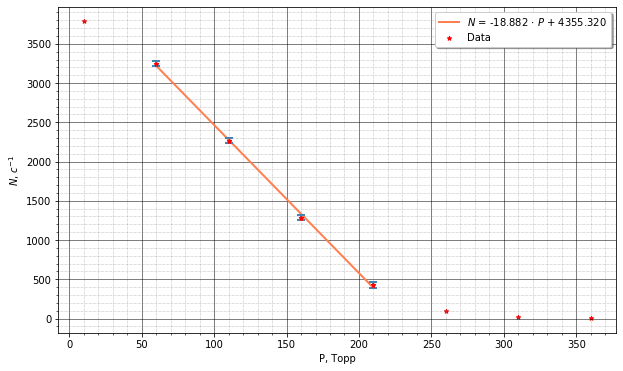

In [134]:
def approx(x, a, b):  # определим функцию аппроксимации
    return a*x+b

beta_opt1, beta_cov1 = curve_fit(approx, X_data, Y_data)

# коэффициенты
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)

# подсчитаем стандартную ошибку аппроксимации
residuals1 = Y_data - approx(X_data,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X_data))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))


# если гиафик не линейный, то лучше создать массив точек, чтобы график был плавным,
# вместо X_data вставить dots код ниже
# dots = np.arange(start, stop, step)
ax.plot(X_data, approx(X_data, *beta_opt1), 'coral', lw = 2)


ax.scatter(x_data, y_data, marker = '*', color = 'red', s = 20) # это строит "звездочками" твои начальные данные

lgnd = ax.legend([r'$N$ = %.3f $\cdot$ $P$ + %.3f ' %(a,b), 'Data'], loc='best', shadow=True) # это легенда в графике
# поставив r перед '' можно внутри '' писать латеховские формулы внутри $$
# кожффициенты аппроксимации можно не писать каждый раз самому, а сделать ссылку на переменную через %.3f и в конце написать %(a)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'$N$, $c^{-1}$')
ax.set_xlabel(r'P, Торр')

# это создает сетку и делает маркеры на осях
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

# это кресты погрещности, но только вдоль оси Y
plt.errorbar(X_data, Y_data, fmt = 'ro', marker = '*', markersize = '5', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'steelblue')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('gr3.png', dpi=400, quality=100)
plt.show()

In [136]:
b/a 

-230.65988772373132

In [139]:
np.sqrt(2.3178792956476553**2 + 1.4683097376913796**2)/100

0.027438108380483155

In [147]:
150 / 760 * 9 * 0.001293

0.002296776315789474

In [148]:
150 / 760 * 9 * 0.001293 * 0.027438108380483155

6.301919747835839e-05

In [151]:
(2.3*10**(-3) / 0.32)**(2/3)

0.03724362156750361

In [152]:
(2.3*10**(-3) / 0.32)**(2/3)* np.sqrt(2.3178792956476553**2 + 1.4683097376913796**2)/100

0.001021894525050864